# HW1: Practice Python

In [27]:
# Install oceanography tools
!pip install gsw
!pip install haversine

In [28]:
# Import Modules
import xarray as xr
import pandas as pd
import numpy as np
import gsw
import matplotlib.pyplot as plt
import haversine as hs

In [50]:
# Use example data from Argo floats to experiment with Pandas. 
floatDF = pd.read_csv('data/FloatData_DF.csv', index_col=[0])
floatDF.head()

,Julian Day,Julian Day QC,Latitude,Longitude,Position QC,Pressure,Pressure QC,Temperature Adjusted,Temperature Adjusted QC,Temperature,...,Salinity Adjusted QC,Salinity,Salinity QC,Oxygen,Oxygen QC,Nitrate,Nitrate QC,pH,pH QC,Yearday
2,2019-05-11 07:44:49.000814848,1,-35.025,29.988,1,7.800000,1.0,21.239601,1.0,21.266001,...,1.0,35.581001,1.0,220.721359,1.0,-0.594459,1.0,8.070192,1.0,130.322789
4,2019-05-11 07:44:49.000814848,1,-35.025,29.988,1,11.800000,1.0,21.238828,1.0,21.266001,...,1.0,35.581001,1.0,220.629868,1.0,-0.747419,1.0,8.069442,1.0,130.322789
6,2019-05-11 07:44:49.000814848,1,-35.025,29.988,1,15.800000,1.0,21.230985,1.0,21.259001,...,1.0,35.583000,1.0,220.523651,1.0,-0.743400,1.0,8.069372,1.0,130.322789
9,2019-05-11 07:44:49.000814848,1,-35.025,29.988,1,21.799999,1.0,21.193513,1.0,21.223000,...,1.0,35.591999,1.0,220.215622,1.0,-0.763693,1.0,8.067467,1.0,130.322789
11,2019-05-11 07:44:49.000814848,1,-35.025,29.988,1,25.799999,1.0,21.175701,1.0,21.205999,...,1.0,35.592999,1.0,219.909927,1.0,-0.769277,1.0,8.066362,1.0,130.322789


In [51]:
# Create method to add densities
def add_density(df):
    df['Sigma0'] = gsw.sigma0(floatDF['Salinity Adjusted'], floatDF['Temperature Adjusted'])
    df['Sigma1'] = gsw.sigma1(floatDF['Salinity Adjusted'], floatDF['Temperature Adjusted'])
    df['Sigma2'] = gsw.sigma2(floatDF['Salinity Adjusted'], floatDF['Temperature Adjusted'])
    return df

floatDF = add_density(floatDF)

In [72]:
# Simplify and subset dataframe
data = floatDF[['Latitude', 'Longitude', 'Yearday', 'Pressure', 'Temperature', 'Salinity', 'pH',
                    'Sigma0', 'Sigma1', 'Sigma2']].copy()
data

,Latitude,Longitude,Yearday,Pressure,Temperature,Salinity,pH,Sigma0,Sigma1,Sigma2
2,-35.025,29.988,130.322789,7.800000,21.266001,35.581001,8.070192,24.867128,29.117102,33.274322
4,-35.025,29.988,130.322789,11.800000,21.266001,35.581001,8.069442,24.867339,29.117324,33.274555
6,-35.025,29.988,130.322789,15.800000,21.259001,35.583000,8.069372,24.870989,29.121076,33.278407
9,-35.025,29.988,130.322789,21.799999,21.223000,35.591999,8.067467,24.888050,29.138631,33.296442
11,-35.025,29.988,130.322789,25.799999,21.205999,35.592999,8.066362,24.893696,29.144533,33.302593
...,...,...,...,...,...,...,...,...,...,...
298708,-49.326,90.346,1024.784537,1600.020020,2.444800,34.667801,7.839884,27.683183,32.328360,36.869507
298709,-49.326,90.346,1024.784537,1700.199951,2.368700,34.695599,7.846263,27.712449,32.359706,36.902876
298710,-49.326,90.346,1024.784537,1800.000000,2.324600,34.722301,7.857783,27.738189,32.386663,36.931018
298711,-49.326,90.346,1024.784537,1899.449951,2.252200,34.734402,7.858600,27.754503,32.405095,36.951509


In [59]:
# Initialize Numpy array and fill with values

lonarray = data.Longitude
latarray = data.Latitude
lat = 47.6062
lon = - 122.3321

arr = np.empty(len(lonarray))

# Find distance between each float data point and Seatttle :) 
for i in np.arange(0,len(latarray)):
    dist = hs.haversine((lat,lon),(latarray.iloc[i],lonarray.iloc[i]))
    arr[i] = dist

distance_from_Seattle = pd.Series(arr, dtype='float64')
distance_from_Seattle

0        17334.804765
1        17334.804765
2        17334.804765
3        17334.804765
4        17334.804765
             ...     
14961    17617.098395
14962    17617.098395
14963    17617.098395
14964    17617.098395
14965    17617.098395
Length: 14966, dtype: float64

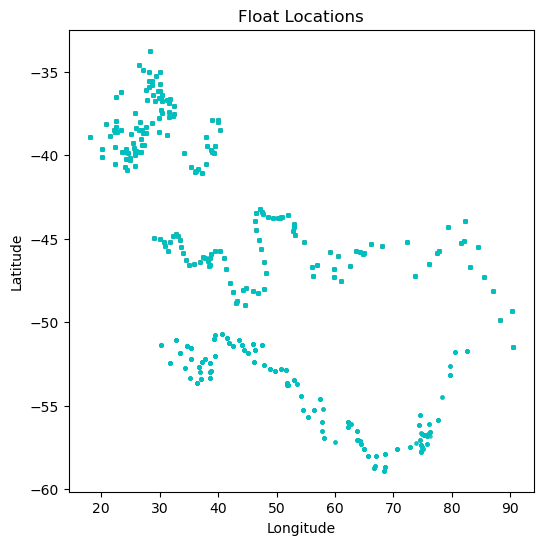

In [67]:
# Simple plot of Argo float locations

fig= plt.figure(figsize=(6,6))
ax = fig.gca()
plt.scatter(data['Longitude'], data['Latitude'], c='c', alpha=0.5, s=5)
plt.title('Float Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('figures/hw1_float_locs.png')

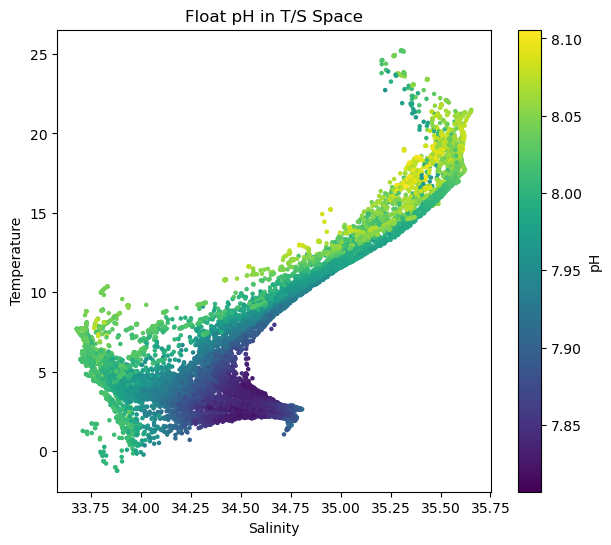

In [79]:
# Simple plot of pH in Temperature-Salinity space

fig = plt.figure(figsize=(7,6))
ax = fig.gca()
plt.scatter(data['Salinity'], data['Temperature'], c=data['pH'], s=5)
plt.title('Float pH in T/S Space')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.colorbar(label='pH')

plt.savefig('figures/hw1_float_pH.png')

In [89]:
# Practice initializing a list

# Fill empty list with all pH observations from below 50deg S
list = [] 

for i in np.arange(0,len(data)):
    if data['Latitude'].iloc[i] <= -50: 
        list.append(data['pH'].iloc[i])

list[-10:]

[7.861379146575928,
 7.871399879455566,
 7.872107028961182,
 7.87690544128418,
 7.876463890075684]

In [ ]:
d